# Linear Algebra

**Estimated Time**: 15-20 Minutes <br>
**Module Developer**: James Geronimo

### Table of Contents

1. Introduction <br>
    1.1. Learning Objectives <br>
    1.2. Setup <br>
2. Linear Algebra <br>
    2.1. Vectors and Matrices <br>
    2.2. Vector Operations <br>
    2.3. Matrix Operations <br>
3. Linear Algebra in Data Science <br>
    3.1. Data Representation <br>
    3.2. Data Construction <br>
    3.3. Data Visualization <br>
    3.4. Data Transformation: Principal Component Analysis (PCA) <br>
4. Conclusion

***

## 1. Introduction

### 1.1. Learning Objectives

Oftentimes, data science involves working with high-dimensional data, where linear algebra plays a crucial role in data representation and manipulation. Many algorithms—such as those used for regression, clustering, and dimensionality reduction (like Principal Component Analysis)—are built on linear algebra foundations (like Singular Value Decomposition). This intersection between linear algebra and data science is profound, so understanding the two fields is imperative for understanding the subjects with greater perspective. This module will go over:

- **Basic Linear Algebra Concepts:** Vectors, matrices, and their basic operations (addition, multiplication, etc.).
- **Applications to Data Science:** Data representation, transformations, and dimensionality reduction.

### 1.2. Setup

Below, we have imported some Python libraries that are necessary for this module. Make sure to run this cell before running any other code cells!

In [75]:
import numpy as np
np.random.seed(42) # For reproducibility

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

***

## 2. Linear Algebra

### 2.1. Vectors and Matrices

Linear algebra heavily relies on **vectors** and **matrices** for data representation and transformations. A **vector** is an ordered list of numbers, often used to represent data points or features:

$$\mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$$

A **matrix** is a rectangular array of numbers, widely used in solving equations and performing transformations:

$$\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$$

In `NumPy`, they can be defined as follows:

In [85]:
# Defining a vector (1-dimensional array)
vector = np.array([1, 2, 3])

print("Vector:\n", vector)

Vector:
 [1 2 3]


In [86]:
# Defining a 2x3 matrix (2-dimensional array)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

print("Matrix:\n", matrix)

Matrix:
 [[1 2 3]
 [4 5 6]]


### 2.2. Vector Operations

Vectors can use operations such as **addition**, **dot products**, and **scalar multiplication**. For addition and dot products, the two vectors must have be the same size. The **sum** of two vectors is computed element-wise:

$$
\mathbf{v} + \mathbf{w} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix} 5 \\ 7 \\ 9 \end{bmatrix}
$$

The **dot product** of two vectors is given by:

$$\mathbf{v} \cdot \mathbf{w} = (1 \times 4) + (2 \times 5) + (3 \times 6) = 32$$

In `NumPy`, these operations can be performed as follows:

In [87]:
# Vector addition
vector2 = np.array([4, 5, 6])
vector_sum = vector + vector2

print("Vector Sum:\n", vector_sum)

Vector Sum:
 [5 7 9]


In [88]:
# Dot product of two vectors
dot_product = np.dot(vector, vector2)

print("Dot Product:\n", dot_product)

Dot Product:
 32


### 2.3. Matrix Operations

Matrices extend vectors to multiple dimensions, supporting operations like **addition**, **multiplication**, and **transposition**. Matrix **addition** is performed element-wise (requires matrices of the same shape):

$$
\mathbf{A} + \mathbf{B} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} + \begin{bmatrix} 7 & 8 & 9 \\ 10 & 11 & 12 \end{bmatrix} = \begin{bmatrix} 8 & 10 & 12 \\ 14 & 16 & 18 \end{bmatrix}
$$

Matrix **multiplication** follows row-column dot products (requires inner dimensions to match):

$$
\mathbf{A} \cdot \mathbf{B}^T = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \times \begin{bmatrix} 7 & 8 & 9 \\ 10 & 11 & 12 \end{bmatrix}^T
$$

The **transpose** of a matrix swaps its rows and columns:

$$
\mathbf{A}^T = \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix}
$$

In `NumPy`, these operations can be implemented as:

In [89]:
# Matrix addition
matrix2 = np.array([[7, 8, 9],
                    [10, 11, 12]])
matrix_sum = matrix + matrix2

print("Matrix Sum: \n", matrix_sum)

Matrix Sum: 
 [[ 8 10 12]
 [14 16 18]]


In [90]:
# Matrix multiplication
matrix_mult = np.dot(matrix, matrix2.T)

print("Matrix Multiplication: \n", matrix_mult)

Matrix Multiplication: 
 [[ 50  68]
 [122 167]]


In [91]:
# Transpose of a matrix
matrix_transpose = matrix.T

print("Transpose of the matrix: \n", matrix_transpose)

Transpose of the matrix: 
 [[1 4]
 [2 5]
 [3 6]]


***

## 3. Linear Algebra in Data Science

### 3.1. Data Representation

#### Data Representation with Matrices

In data science, datasets are often represented as matrices, where:
- **Rows** represent individual data samples.
- **Columns** represent features (variables).

Let's create a simple dataset by building a matrix like we did before.

In [92]:
simple_data = np.array([[1.2, 3.4, 5.6],
                 [2.3, 4.5, 6.7],
                 [3.1, 5.2, 7.3],
                 [4.0, 6.1, 8.2]])

print("Dataset:\n", simple_data)

Dataset:
 [[1.2 3.4 5.6]
 [2.3 4.5 6.7]
 [3.1 5.2 7.3]
 [4.  6.1 8.2]]


### 3.2. Data Construction

Now that we know how to manually build a simple dataset represented in matrix form, we can use `NumPy` functions to randomize and automate this process. We will use [`np.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), which returns a sample(s) from the standard normal distribution.

In [94]:
rows = 400
columns = 6
data = np.random.randn(rows, columns)
data

array([[-0.72173755,  0.17682087, -0.54668008, -0.27165511,  1.67345209,
         1.34046105],
       [-1.29958124,  0.82973242,  0.81139655, -1.14826329,  0.81877764,
         1.53793192],
       [-1.12254481, -0.91750282,  1.01766147,  0.27149531,  0.55147628,
         0.34058922],
       ...,
       [-1.69067163, -0.97849955,  2.75521774, -0.30561061,  0.73095898,
        -0.65065983],
       [-2.0903029 , -0.17025825, -0.26560456, -0.39987824, -0.11464084,
         0.26426827],
       [-0.15011695, -1.26400617,  0.48618479, -1.94937176, -2.05035746,
         0.73918049]], shape=(400, 6))

From the output, it is a bit difficult to understand the form our data is in, apart from predefining the number of rows and columns. We can use `pandas` to convert the data into a DataFrame that is easier to interact with. Additionally, we will arbitrarily add a "Cluster" feature, which will be useful in the next part.

In [96]:
# Create a DataFrame for better visualization with column names
columns = [f"Feature {i+1}" for i in range(n_features)]
df = pd.DataFrame(data, columns=columns)

# Disregard, creating offsets in the data
df.loc[:200, "Feature 2"] += 4.5
df.loc[:200, "Feature 4"] += -1.4

# Disregard, creating cluster labels
df["Cluster"] = [0 if i < 200 else 1 for i in range(n_samples)]

# Show the first five rows of the data
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Cluster
0,-0.721738,9.176821,-0.546680,-3.071655,1.673452,1.340461,0
1,-1.299581,9.829732,0.811397,-3.948263,0.818778,1.537932,0
2,-1.122545,8.082497,1.017661,-2.528505,0.551476,0.340589,0
3,0.390696,7.673528,1.047318,-1.630410,-0.229391,-0.043477,0
4,-1.531108,9.514255,0.572057,-2.862191,1.124353,-0.334077,0


### 3.3 Data Visualization

Now that we have our data in an organized DataFrame, we can try plotting the data against each other in order to find relationships amongst the features. We will also make use of the "Cluster" feature to differentiate the two classes of points. 

For this task, we will utilize the `matplotlib` and `seaborn` libraries. Particularly, [`sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

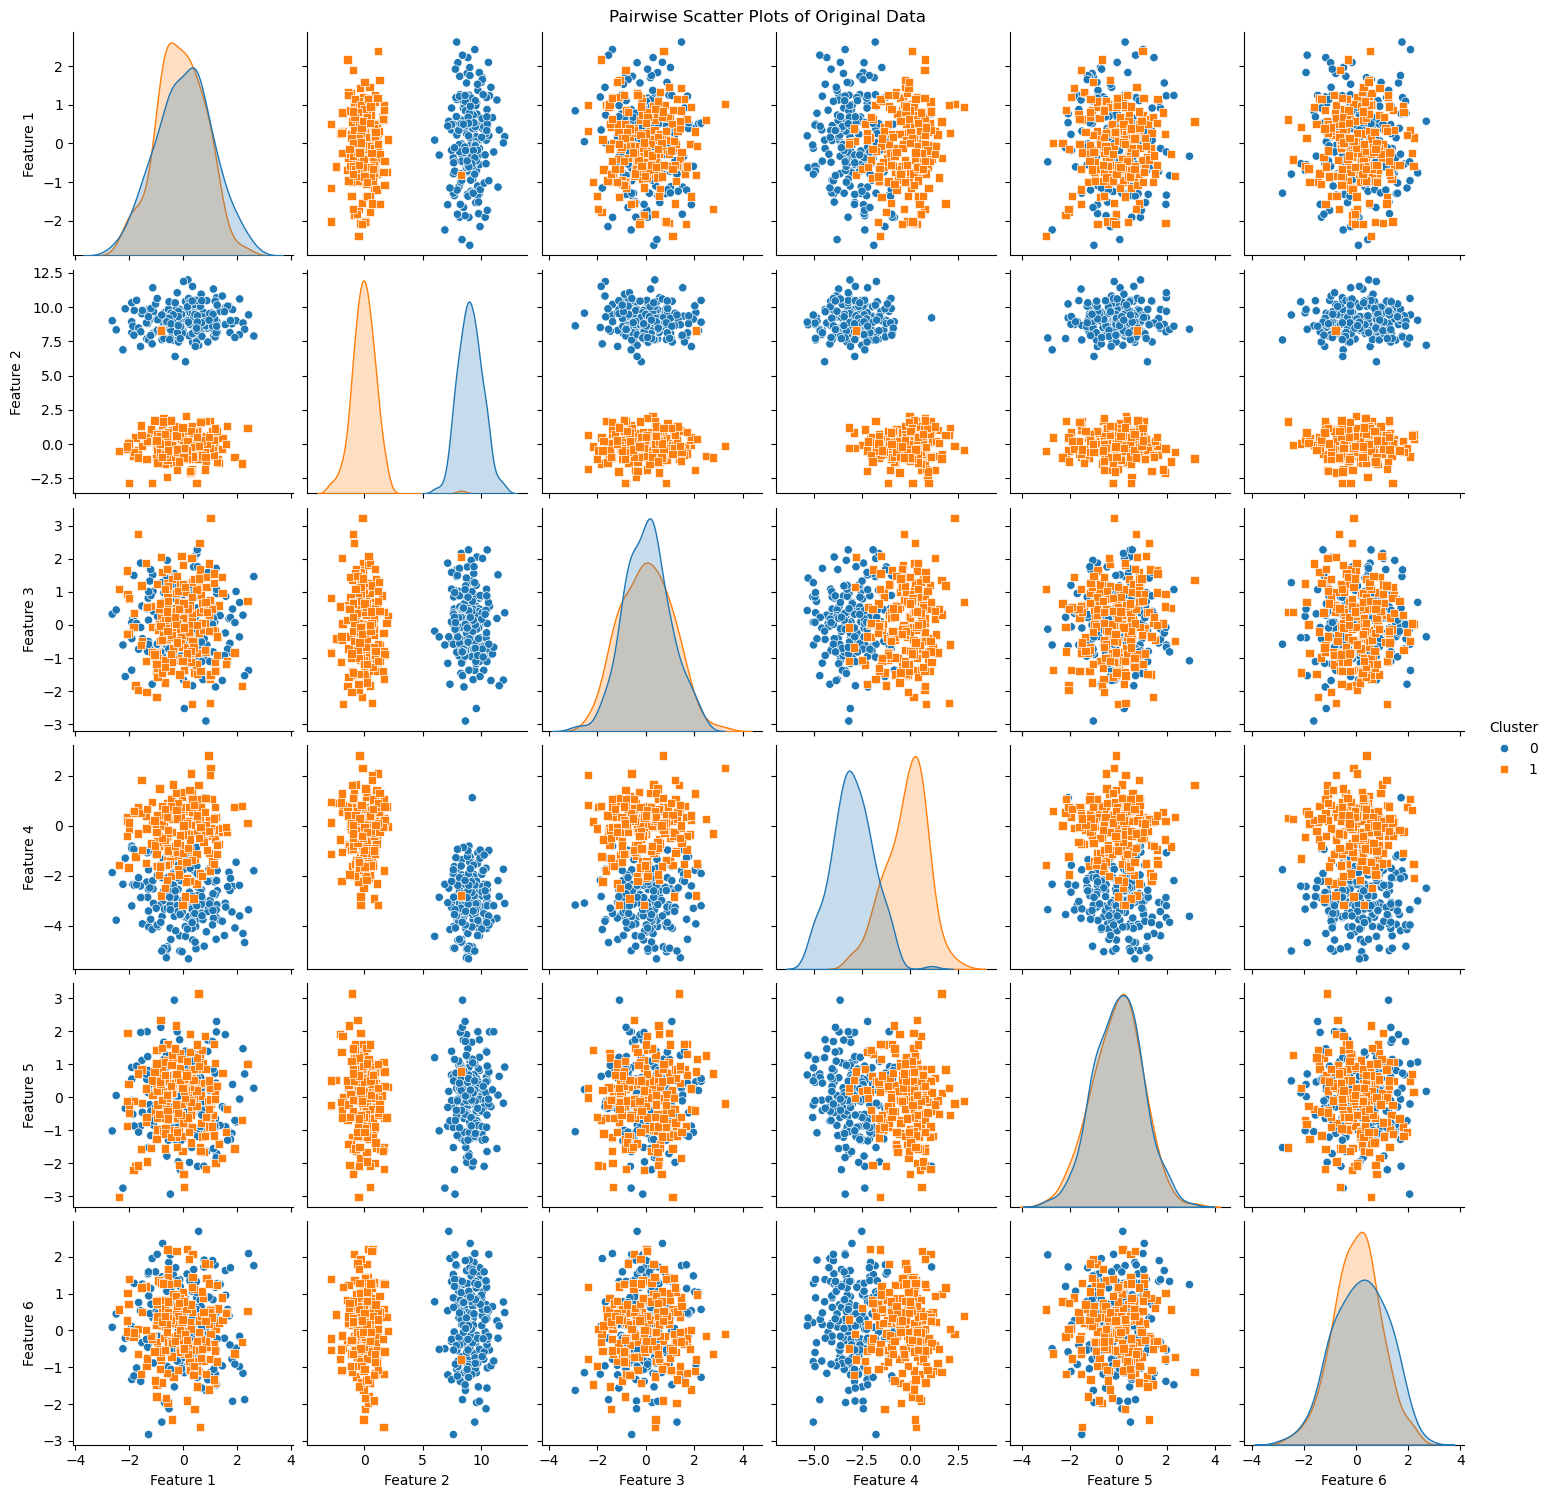

In [106]:
# Visualize using pairwise scatter plots
sns.pairplot(df, hue='Cluster', diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pairwise Scatter Plots of Original Data", y=1)
plt.show()

### 3.4. Data Transformation: Principal Component Analysis (PCA)

#### Principal Component Analysis (PCA)

PCA is a powerful technique used in data science for:
- **Dimensionality Reduction:** Reducing the number of features while preserving most of the variance.
- **Visualization:** Often used to project high-dimensional data into 2D or 3D space.

PCA relies heavily on linear algebra concepts like eigenvalues, eigenvectors, and Singular Value Decomposition (SVD).

Let's perform PCA on our synthetic dataset.

Explained Variance Ratio: [0.29999881 0.17930061]


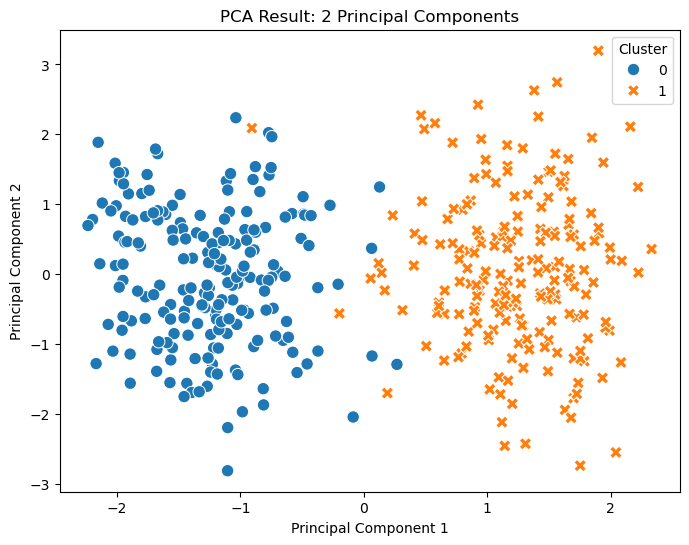

In [107]:
# Exclude "Cluster" column
features = df.columns[:-1] 

# Standardize the features before applying PCA
scaler = StandardScaler()
data_std = scaler.fit_transform(df[features])

# Apply PCA to reduce data to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)

# Explained variance ratio explains how much variance is captured by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Visualize PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style='Cluster', s=80, data=pca_df)
plt.title("PCA Result: 2 Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")\
plt.show()

From here, we might try to analyze how much variance is captured by each principal component from the explained variance ratio. Then, we can try to determine the optimal number of principal components for reducing the dimensionality of our dataset. This can be done using a [scree plot](https://en.wikipedia.org/wiki/Scree_plot). Finally, we could apply the PCA-transformed data to classification, clustering, or regression models to see if we get more accurate results.

***

## 4. Conclusion

In this module, we:
- Reviewed essential linear algebra concepts such as vectors, matrices, and their operations.
- Explored how these concepts can be represented in code and apply to data science.
- Demonstrated a practical application using PCA to analyze a randomly generated dataset.

Linear algebra is a powerful tool in data science. By understanding and applying these concepts, you can gain deeper insights into data manipulation, transformation, and analysis.